This notebook load and visualize previously recorded data.

In [1]:
%cd ..

c:\Code\Armband


In [2]:
import os
import time
import numpy as np

import cv2

from scipy.fft import fft
from scipy.signal import stft
from scipy.signal import cwt
from scipy import signal
import brainflow
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowError

from tqdm.notebook import tqdm
import datetime
from matplotlib import pyplot as plt

from utils.armband import init
from utils.visualize import showMe
from utils.signal import DCFilter
from config.armband import *
from IPython.display import clear_output
from utils.data import load_set, pre_process_set, format2train, shuffle
from utils.signal import normalize
from scipy.signal import resample

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
asd = np.zeros(5)
asd[-1] = 1
asd = np.roll(asd, -1)
asd

array([0., 0., 0., 1., 0.])

In [3]:
sessions = []
for subject in os.listdir(settings['data_path']):
    for session in os.listdir(os.path.join(settings['data_path'],subject)):
        sessions.append(os.path.join(settings['data_path'], subject,session))


val_sessions = ['data\\Nemes\\session_5', 'data\\Bence\\session_2']

train_sessions = []
for session in sessions:
    if not session  in val_sessions:
        train_sessions.append(session)


print("-----------   TRAIN SESSION:  ------------------")
print(train_sessions)
print()
print()
print("-----------   VAL SESSIONS:   ------------------")
print(val_sessions)

-----------   TRAIN SESSION:  ------------------
['data\\Kristof\\session_1', 'data\\Nemes\\session_0', 'data\\Nemes\\session_1', 'data\\Nemes\\session_2', 'data\\Nemes\\session_3', 'data\\Nemes\\session_4', 'data\\Nemes\\session_6']


-----------   VAL SESSIONS:   ------------------
['data\\Nemes\\session_5', 'data\\Bence\\session_2']


In [4]:
print("Loading TRAIN SET:")
train_set = load_set(train_sessions)
print()
print()
print("Loading VAL SET:")
val_set = load_set(val_sessions)

Loading TRAIN SET:
Rest: (307, 8, 1000)
Left: (307, 8, 1000)
Right: (307, 8, 1000)
Fist: (307, 8, 1000)


Loading VAL SET:
Rest: (55, 8, 1000)
Left: (55, 8, 1000)
Right: (55, 8, 1000)
Fist: (55, 8, 1000)


In [5]:
demo = train_set['Fist'][0]
print(demo.shape)

(8, 1000)


In [1]:
vis = Visualizes()
#vis.show(normalize(demo[0]))

for i in range(10):
    sl = demo[:,i*100:(i+1)*100]
    vis.showEMG(normalize(sl))
cv2.destroyAllWindows()


# while True:
#     k = cv2.waitKey(0) & 0xFF

#     if k == 27:
#         cv2.destroyAllWindows()
#         break

NameError: name 'Visualizes' is not defined

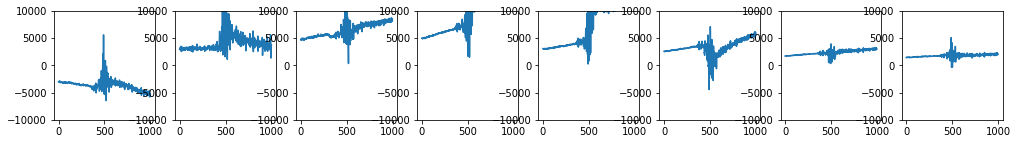

<Figure size 1224x144 with 0 Axes>

In [35]:
showMe(demo)

(200,)


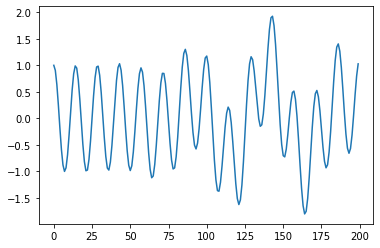

(30, 200)


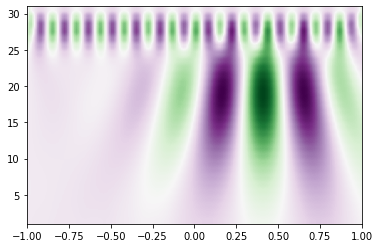

In [14]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
print(sig.shape)
plt.plot(sig)
plt.show()
wavelet = cwt(sig, signal.ricker, np.arange(1, 31))
print(wavelet.shape)
plt.imshow(wavelet, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto')

(8,)


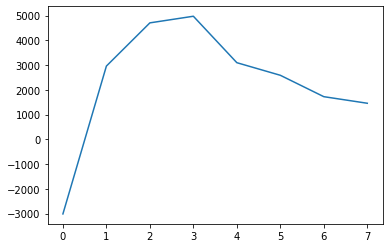

(3, 8)


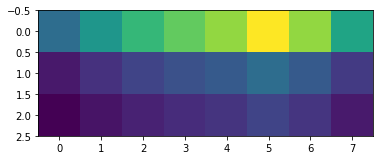

In [33]:
demo = np.transpose(demo)
d = demo[0]
print(d.shape)
plt.plot(d)
plt.show()

wavelet  = cwt(d, signal.ricker,[100,500,1000])
print(wavelet .shape)

plt.imshow(wavelet)

In [21]:
print(wavelet)

[[-3820.21377476 -2748.21503073  3036.77716884  3473.62096859
   1162.20038947  -390.1285074   -223.45527659   190.27563782]
 [-3183.97881138  -708.85044405  3473.48765051  6218.53167826
   5662.23384468  2742.54802986  1253.54784797   448.22416338]
 [ -411.75655821  1789.63668157  4430.39184247  6453.75489999
   6943.90680874  5347.09588102  3688.72019651  2266.26245173]
 [ 1120.60660559  2909.66319141  4782.95023431  6233.83427219
   6865.51976692  6282.34998065  4818.26368208  3266.37679419]
 [ 1826.91018393  3325.80979455  4788.70542758  5902.80995878
   6509.60001951  6475.78085612  5192.41804428  3656.01370879]
 [ 2140.31801029  3441.85157449  4660.06285816  5568.84760272
   6127.8090698   6386.696135    5240.43770717  3760.35329724]
 [ 2267.69254818  3429.47164577  4487.83913534  5262.81819173
   5777.20403995  6195.60268716  5152.98204405  3738.1332425 ]
 [ 2303.90342542  3362.00864601  4308.24280244  4990.4873745
   5467.29127464  5974.0051966   5011.85997568  3660.8591384 ]
 

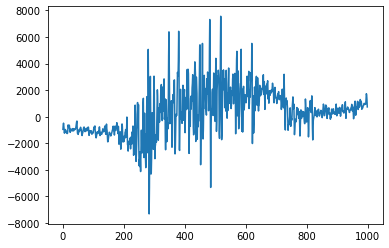

In [17]:
plt.plot(single_channel)

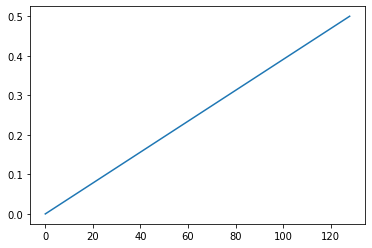

In [36]:
plt.plot(fft_data)
plt.show()

In [23]:
Fs = 500
tx = np.arange(start=0, stop=1, step=1/Fs) # step == dt

n = np.size(tx)
freq_axis = int(Fs/2) * np.linspace(0,1,int(n/2)) # frequency axis: 0->500 Hz and generate half spectrum
X_corrected = abs(fft_data[0:np.size(freq_axis)] ) * int(2/n)


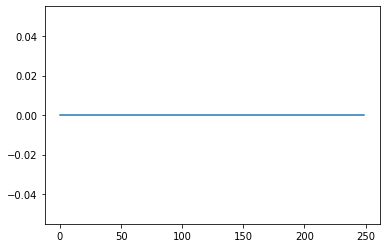

In [24]:
plt.plot(X_corrected)

In [ ]:
for i, s in enumerate(store):
    print(settings["classes"][i])
    for d in s:
        showMe(d)

In [ ]:
print(len(sessions))

In [ ]:
for session in sessions:
    for Stack in session:
        print(Stack)
        sample = session[Stack][0][0]
        showMe(sample)
    #input('Next')
    clear_output()
    